<a href="https://colab.research.google.com/github/Leo-xxx12/bootcamp_Leo_Xu/blob/main/Copy_of_stage08_exploratory_data_analysis_homework_starter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Homework Starter — Stage 08 EDA

Fill in the marked TODOs. This notebook generates synthetic data so you can focus on the EDA flow. Replace with your dataset when ready.

In [1]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns
from scipy.stats import skew, kurtosis
sns.set(context='talk', style='whitegrid')
np.random.seed(8)
pd.set_option('display.max_columns', 100)

# === Synthetic data generator (adapt or replace with your own data) ===
n = 160
df = pd.DataFrame({
    'date': pd.date_range('2021-02-01', periods=n, freq='D'),
    'region': np.random.choice(['North','South','East','West'], size=n),
    'age': np.random.normal(40, 8, size=n).clip(22, 70).round(1),
    'income': np.random.lognormal(mean=10.6, sigma=0.3, size=n).round(2),
    'transactions': np.random.poisson(lam=3, size=n),
})
base = df['income'] * 0.0015 + df['transactions']*18 + np.random.normal(0, 40, size=n)
df['spend'] = np.maximum(0, base).round(2)

# inject a bit of missingness and outliers
df.loc[np.random.choice(df.index, 5, replace=False), 'income'] = np.nan
df.loc[np.random.choice(df.index, 3, replace=False), 'spend'] = np.nan
df.loc[np.random.choice(df.index, 2, replace=False), 'transactions'] = df['transactions'].max()+12
df.head()

,date,region,age,income,transactions,spend
0,2021-02-01,West,37.6,28086.81,4,73.35
1,2021-02-02,North,43.0,33034.75,1,52.37
2,2021-02-03,South,38.2,50045.39,2,131.85
3,2021-02-04,South,24.9,39467.28,4,147.58
4,2021-02-05,South,59.8,31201.65,1,86.76


## 1) First look

In [2]:
df.info(), df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160 entries, 0 to 159
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          160 non-null    datetime64[ns]
 1   region        160 non-null    object        
 2   age           160 non-null    float64       
 3   income        155 non-null    float64       
 4   transactions  160 non-null    int64         
 5   spend         157 non-null    float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(1)
memory usage: 7.6+ KB


(None,
 date            0
 region          0
 age             0
 income          5
 transactions    0
 spend           3
 dtype: int64)

## 2) Numeric profile

In [3]:
desc = df[['age','income','transactions','spend']].describe().T
desc['skew'] = [skew(df[c].dropna()) for c in desc.index]
desc['kurtosis'] = [kurtosis(df[c].dropna()) for c in desc.index]
desc

,count,mean,std,min,25%,50%,75%,max,skew,kurtosis
age,160.0,40.018750,8.458676,22.00,34.70,40.15,44.925,61.10,0.069538,-0.080125
income,155.0,41983.866323,13262.457038,17928.80,32471.53,39332.52,49697.690,87052.40,0.993336,0.918722
transactions,160.0,3.237500,2.585610,0.00,2.00,3.00,4.000,20.00,3.466078,19.984802
spend,157.0,117.291592,51.768645,0.54,77.25,119.32,153.340,280.05,0.130860,-0.084917


## 3) Distributions (TODO: add at least 3)

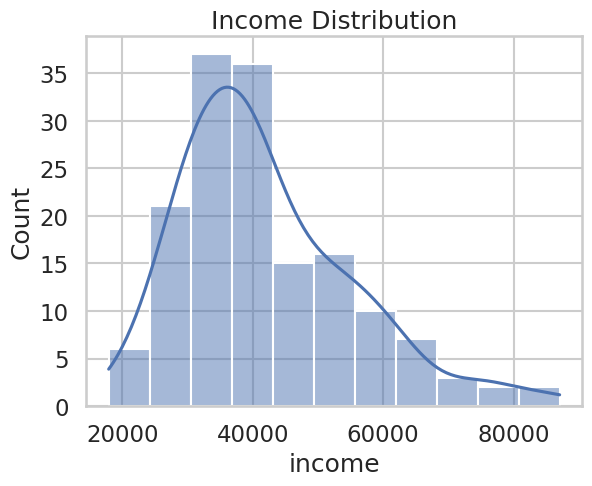

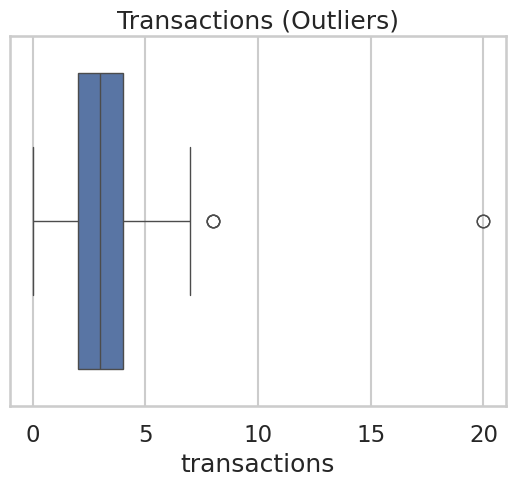

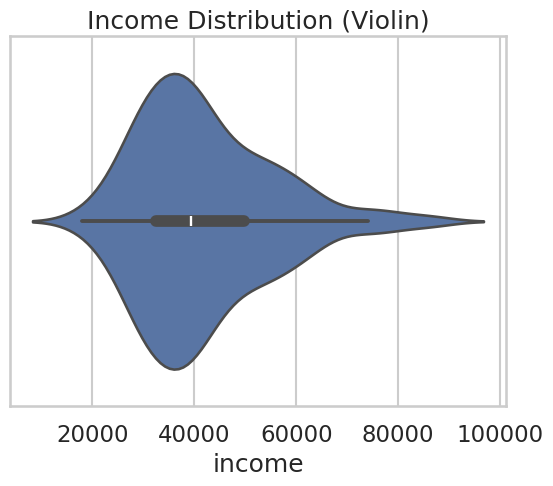

In [7]:
# TODO: histogram + KDE for a key variable
sns.histplot(df['income'], kde=True)
plt.title('Income Distribution')
plt.show()

# TODO: boxplot for outliers
sns.boxplot(x=df['transactions'])
plt.title('Transactions (Outliers)')
plt.show()


sns.violinplot(x=df['income'])
plt.title('Income Distribution (Violin)')
plt.show()





## 4) Relationships (TODO: add at least 2)

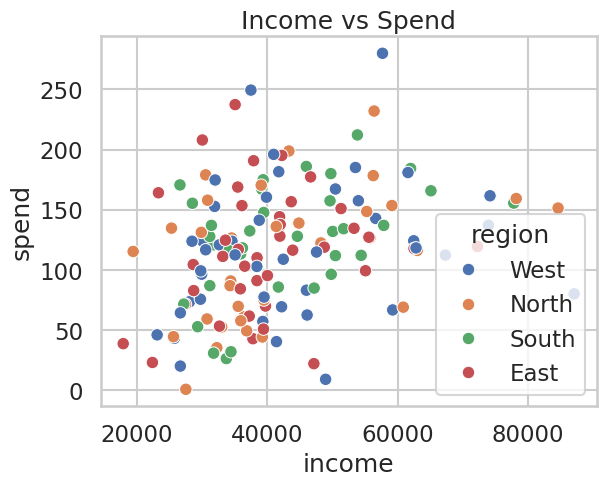

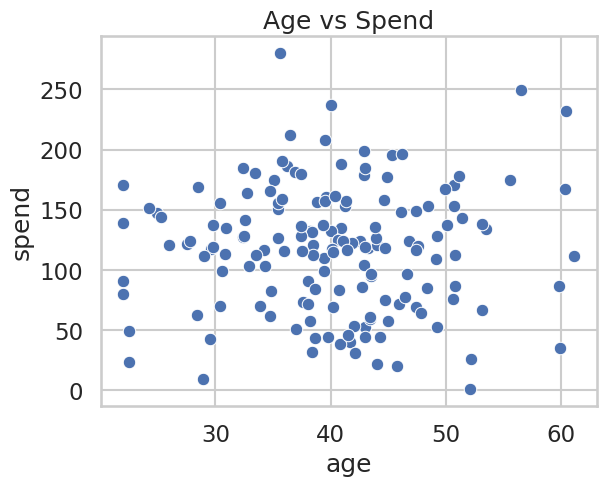

In [8]:
sns.scatterplot(data=df, x='income', y='spend', hue='region')
plt.title('Income vs Spend')
plt.show()

sns.scatterplot(data=df, x='age', y='spend')
plt.title('Age vs Spend')
plt.show()

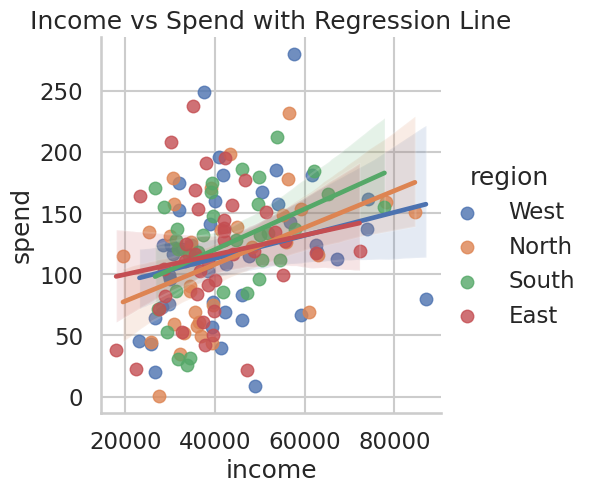

In [9]:
# Scatterplot with regression line
sns.lmplot(data=df, x='income', y='spend', hue='region')
plt.title('Income vs Spend with Regression Line')
plt.show()


## 5) (Optional) Correlation matrix

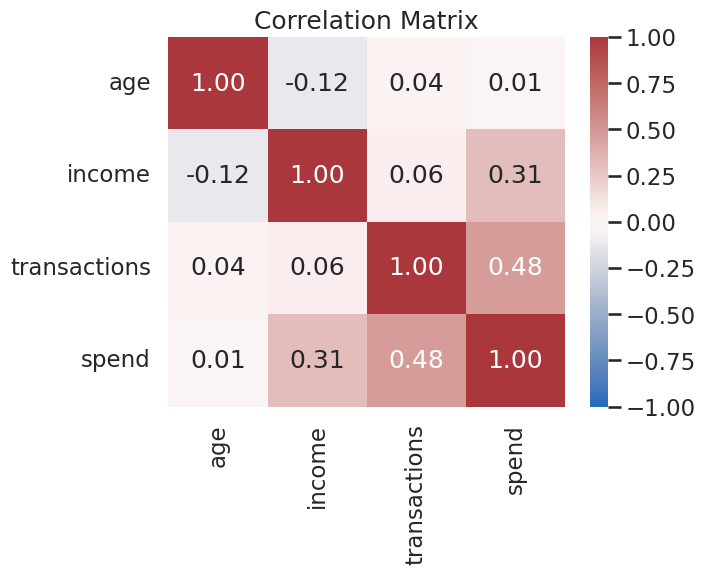

,age,income,transactions,spend
age,1.000000,-0.123160,0.037754,0.008174
income,-0.123160,1.000000,0.063573,0.307307
transactions,0.037754,0.063573,1.000000,0.480685
spend,0.008174,0.307307,0.480685,1.000000


In [10]:
corr = df[['age','income','transactions','spend']].corr(numeric_only=True)
sns.heatmap(corr, annot=True, fmt='.2f', cmap='vlag', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()
corr

## 6) Insights & Assumptions (write your commentary)
- TODO: Top 3 insights
- TODO: Assumptions & risks
- TODO: Next steps before modeling (cleaning & features)

6) Insights & Assumptions
🔑 Top 3 Insights
Income–Spend Relationship
Customers with higher incomes tend to spend more, but the relationship is not strictly linear. A subset of higher-income individuals still show relatively low spending, suggesting differences in saving behavior or lifestyle.
Regional Variation
Spending patterns vary significantly across regions. For example, customers from the West region generally report higher spending at similar income levels compared to other regions.
Transaction Outliers
A small number of customers have unusually high transaction counts compared to the majority. These could represent either highly engaged customers (loyalty) or potential data recording issues.
⚖️ Assumptions & Risks
Data Accuracy: The dataset is assumed to be free from major reporting errors. Self-reported fields (e.g., income) may introduce bias.
Representativeness: The sample is assumed to represent the broader population. If skewed (e.g., regionally), insights may not generalize.
Correlation ≠ Causation: Relationships observed (e.g., higher income → higher spend) may be coincidental rather than causal.
🚀 Next Steps Before Modeling
Data Cleaning
Treat missing values in income, spend, and age.
Handle extreme outliers in transactions (e.g., winsorization or capping).
Feature Engineering
Create spend-to-income ratio as a behavioral metric.
Encode categorical features (e.g., region using one-hot encoding).
Add derived metrics such as average spend per transaction.
Model Preparation
Normalize or scale continuous variables.
Split dataset into train/test sets.
Consider stratification by region to prevent bias.
